Parte 1: Datos

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# More data info
#iris.DESCR
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Let's keep two classes only, and two variables
X = X[:100, :2]
Y = Y[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


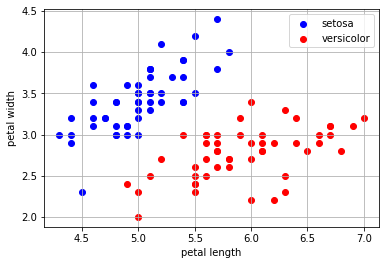

In [ ]:
# Plot it
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='b', label='setosa')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='r', label='versicolor')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

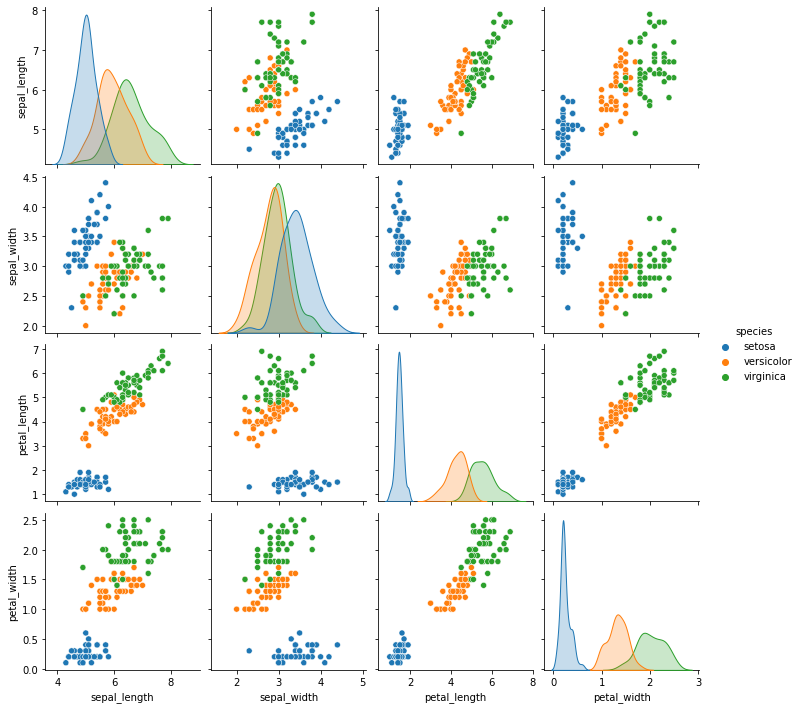

In [ ]:
# == Q1: ==
# Diseña alguna manera de visualizar y diferenciar las 4 dimensiones de los datos usando una gráfica de sólo 2-D
# Muestra tu solución:
import seaborn as sns
import pandas as pd
# CODE
iris = sns.load_dataset("iris")
sns.pairplot(pd.DataFrame(iris), hue="species");
#plt.show()

In [ ]:
# Split data into training+validation and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# x_train, x_test_valid, y_train, y_test_valid = train_test_split(X, Y, test_size=0.4)
# x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=0.5) ## para cuando queramos dividir en train test valid


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


Parte 2: Perceptron

In [ ]:
# More imports to compute accuracy
from sklearn.metrics import accuracy_score

In [ ]:
# Define class linear (step) perceptron
class LPerceptron:
    
    #constructor
    def __init__ (self):
        self.w = None
        self.b = None
    
    #activation function  
    def activation(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    #predict on data
    def predict(self, X):
        Y = []
        for x in X:
            result = self.activation(x)
            Y.append(result)
        return np.array(Y)

    #train
    def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1):
        x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
        
        self.w = np.random.rand(X.shape[1])
        self.b = 0.0
        
        accuracy = np.zeros((2,))
        accuracy[0] = accuracy_score(y_train, self.predict(x_train))
        accuracy[1] = accuracy_score(y_val, self.predict(x_val))
        print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
        
        accuracy = np.zeros((n_epochs, 2))
        for epoch in range(n_epochs): #loop through epochs
            for x, y in zip(x_train, y_train):  #loop through samples
                y_pred = self.activation(x)
                err = y - y_pred
                self.w = self.w + lr * err * x  #LA
                self.b = self.b + lr * err      #LB
            accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
            accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
            print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
            
        return accuracy

In [ ]:
# ### Explica qué sucede en las líneas comentadas como #LA y #LB.

# ### R: 
# - Para cada obsrvación como tupla x, y en cada epoca

# ### ¿Qué significa cada térmido de las ecuaciones?

# - LA: self.w = self.w + lr * err * x  

# - El peso w se actualiza gracias a un paso que se da con el learning rate y es igual a peso + learning rate * valor de la observación*error

# - LB: nos ayuda a actualizar la ordenada al origen de igual manera pero sin multiplicar por la observación x
                

# ### ¿Por qué contienen el térmido de la variable "err"?
# - porque si el error es muy grande la idea es dar pasos más grandes, a diferencia de cuando el error es pequeño


# ### ¿Por qué contienen como un térmido la variable de entrada "x"?
# - Dado que estamos midiendo el cambio respecto a x, entonces la derivada con respecto a al error esta en función del peso w y de la observación x, por eso aparece x

In [ ]:
# Create model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)

Epoch:   0 -- acc: 0.4306, acc_val: 0.5000
Epoch:   1 -- acc: 0.9722, acc_val: 1.0000
Epoch:   2 -- acc: 0.9861, acc_val: 1.0000
Epoch:   3 -- acc: 0.9861, acc_val: 1.0000
Epoch:   4 -- acc: 0.9722, acc_val: 1.0000
Epoch:   5 -- acc: 0.9722, acc_val: 1.0000
Epoch:   6 -- acc: 0.9444, acc_val: 1.0000
Epoch:   7 -- acc: 0.7222, acc_val: 0.7500
Epoch:   8 -- acc: 0.9722, acc_val: 1.0000
Epoch:   9 -- acc: 0.9722, acc_val: 1.0000
Epoch:  10 -- acc: 0.9722, acc_val: 1.0000
Epoch:  11 -- acc: 0.7778, acc_val: 0.8750
Epoch:  12 -- acc: 0.9722, acc_val: 1.0000
Epoch:  13 -- acc: 0.9167, acc_val: 1.0000
Epoch:  14 -- acc: 0.9861, acc_val: 1.0000
Epoch:  15 -- acc: 0.9583, acc_val: 1.0000
Epoch:  16 -- acc: 0.9722, acc_val: 1.0000
Epoch:  17 -- acc: 0.9444, acc_val: 1.0000
Epoch:  18 -- acc: 0.9861, acc_val: 1.0000
Epoch:  19 -- acc: 0.9444, acc_val: 1.0000
Epoch:  20 -- acc: 0.9861, acc_val: 1.0000
Epoch:  21 -- acc: 0.8750, acc_val: 1.0000
Epoch:  22 -- acc: 0.9722, acc_val: 1.0000
Epoch:  23 

In [ ]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 1.0


In [ ]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [  9.16702461 -19.61547601]
bias: -8.099999999999998


In [ ]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras comentar las impresiones parciales) y reporta
# el promedio +- desviación estándar obtenido en la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch:   1 -- acc: 0.9861, acc_val: 0.8750
Epoch:   2 -- acc: 0.4444, acc_val: 0.3750
Epoch:   3 -- acc: 0.4444, acc_val: 0.3750
Epoch:   4 -- acc: 0.9861, acc_val: 0.8750
Epoch:   5 -- acc: 1.0000, acc_val: 0.8750
Epoch:   6 -- acc: 1.0000, acc_val: 0.8750
Epoch:   7 -- acc: 1.0000, acc_val: 0.8750
Epoch:   8 -- acc: 1.0000, acc_val: 0.8750
Epoch:   9 -- acc: 1.0000, acc_val: 0.8750
Epoch:  10 -- acc: 1.0000, acc_val: 0.8750
Epoch:  11 -- acc: 1.0000, acc_val: 0.8750
Epoch:  12 -- acc: 1.0000, acc_val: 0.8750
Epoch:  13 -- acc: 1.0000, acc_val: 0.8750
Epoch:  14 -- acc: 1.0000, acc_val: 0.8750
Epoch:  15 -- acc: 1.0000, acc_val: 0.8750
Epoch:  16 -- acc: 1.0000, acc_val: 0.8750
Epoch:  17 -- acc: 1.0000, acc_val: 0.8750
Epoch:  18 -- acc: 1.0000, acc_val: 0.8750
Epoch:  19 -- acc: 1.0000, acc_val: 0.8750
Epoch:  20 -- acc: 1.0000, acc_val: 0.8750
Epoch:  21 -- acc: 1.0000, acc_val: 0.8750
Epoch:  22 -- acc: 1.0000, acc

In [ ]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

X = iris.data[:100]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch:   1 -- acc: 1.0000, acc_val: 1.0000
Epoch:   2 -- acc: 1.0000, acc_val: 1.0000
Epoch:   3 -- acc: 1.0000, acc_val: 1.0000
Epoch:   4 -- acc: 1.0000, acc_val: 1.0000
Epoch:   5 -- acc: 1.0000, acc_val: 1.0000
Epoch:   6 -- acc: 1.0000, acc_val: 1.0000
Epoch:   7 -- acc: 1.0000, acc_val: 1.0000
Epoch:   8 -- acc: 1.0000, acc_val: 1.0000
Epoch:   9 -- acc: 1.0000, acc_val: 1.0000
Epoch:  10 -- acc: 1.0000, acc_val: 1.0000
Epoch:  11 -- acc: 1.0000, acc_val: 1.0000
Epoch:  12 -- acc: 1.0000, acc_val: 1.0000
Epoch:  13 -- acc: 1.0000, acc_val: 1.0000
Epoch:  14 -- acc: 1.0000, acc_val: 1.0000
Epoch:  15 -- acc: 1.0000, acc_val: 1.0000
Epoch:  16 -- acc: 1.0000, acc_val: 1.0000
Epoch:  17 -- acc: 1.0000, acc_val: 1.0000
Epoch:  18 -- acc: 1.0000, acc_val: 1.0000
Epoch:  19 -- acc: 1.0000, acc_val: 1.0000
Epoch:  20 -- acc: 1.0000, acc_val: 1.0000
Epoch:  21 -- acc: 1.0000, acc_val: 1.0000
Epoch:  22 -- acc: 1.0000, acc

In [ ]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases versicolor (1) y virginica (2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

X = iris.data[50:]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = LPerceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch:   1 -- acc: 0.7778, acc_val: 0.7500
Epoch:   2 -- acc: 0.9167, acc_val: 1.0000
Epoch:   3 -- acc: 0.9583, acc_val: 1.0000
Epoch:   4 -- acc: 0.9722, acc_val: 1.0000
Epoch:   5 -- acc: 0.5417, acc_val: 0.3750
Epoch:   6 -- acc: 0.9306, acc_val: 1.0000
Epoch:   7 -- acc: 0.9583, acc_val: 1.0000
Epoch:   8 -- acc: 0.9444, acc_val: 1.0000
Epoch:   9 -- acc: 0.9583, acc_val: 1.0000
Epoch:  10 -- acc: 0.9583, acc_val: 1.0000
Epoch:  11 -- acc: 0.7500, acc_val: 0.7500
Epoch:  12 -- acc: 0.9444, acc_val: 1.0000
Epoch:  13 -- acc: 0.9583, acc_val: 1.0000
Epoch:  14 -- acc: 0.7778, acc_val: 0.7500
Epoch:  15 -- acc: 0.8056, acc_val: 0.8750
Epoch:  16 -- acc: 0.9444, acc_val: 1.0000
Epoch:  17 -- acc: 0.9583, acc_val: 1.0000
Epoch:  18 -- acc: 0.8194, acc_val: 0.8750
Epoch:  19 -- acc: 0.9444, acc_val: 1.0000
Epoch:  20 -- acc: 0.9583, acc_val: 1.0000
Epoch:  21 -- acc: 0.8333, acc_val: 0.8750
Epoch:  22 -- acc: 0.9444, acc

Part 3: Non-linear (sigmoid) Perceptron

In [ ]:
# == Q6: ==
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [ ]:
# Define class perceptron
class Perceptron:
    
    #constructor
    def __init__ (self):
        self.W = None
        self.b = None
    
    #total neuron input
    def lin_sum(self, X):
        return np.dot(self.W, X) + self.b
    
    #activation (sigmoid)
    def sigmoid(self, s):
        return 1.0 / (1.0 + np.exp(-s))
    
    #derivative of activation (sigmoid)
    def d_sigmoid(self, s):
        return self.sigmoid(s) * (1.0 - self.sigmoid(s))
    
    #predict on data
    def predict(self, X):
        Y = []
        for x in X:
            s = self.lin_sum(x)
            y = self.sigmoid(s)
            Y.append(y)
        return np.array(Y)

    #train
    def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1):
        x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
        
        self.W = np.random.rand(X.shape[1])
        self.b = 0.0
        
        accuracy = np.zeros((2,))
        accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
        accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
        #print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
        
        accuracy = np.zeros((n_epochs, 2))
        for epoch in range(n_epochs): #loop through epochs
            for x, y in zip(x_train, y_train):  #loop through samples
                # Forward pass
                s = # -- CODIGO --
                y_pred = # -- CODIGO --
                # Backward pass
                err = y - y_pred
                self.W = # -- CODIGO --
                self.b = # -- CODIGO --
            accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
            accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
            #print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
            
        return accuracy

In [ ]:
# == Q7: ==
# Repite el experimento anterior usando las 4 variables de las clases versicolor (1) y virginica (2),
# pero ahora usando el Perceptron logístico
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = iris.data[50:]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
    perceptron = Perceptron()
    acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
    ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
    y_test_hat = perceptron.predict(x_test)
    ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.8924 +- 0.1190
Validation:	 0.8788 +- 0.1672
Test:		 0.8700 +- 0.1353


In [ ]:
# == Q8: ==
# Escribe tus conclusiones sobre este ejercicio.